# unpad

## Import packages

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
from porespy.tools import get_border, extend_slice, extract_subsection
ps.visualization.set_mpl_style()

## Generate image for testing

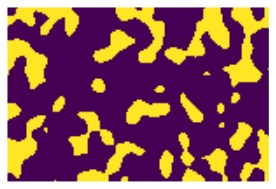

In [2]:
im = ps.generators.blobs([100,150], porosity = 0.3)
fig, ax = plt.subplots(figsize=[4, 4])
ax.imshow(im)
ax.axis(False);

## Apply tool
This should be a standard part of ``numpy``, perhaps ``numpy.pad(pad_width, mode='remove')``, but it's not:

shape original: (100, 150)
shape padded: (140, 190)
shape new unpad: (100, 150)


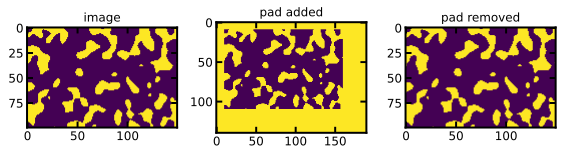

In [3]:
pad_width = [10, 30]
print("shape original:", im.shape)
im1 = np.pad(im, pad_width, mode = "constant", constant_values = 1)
print("shape padded:", im1.shape)
im3 = ps.tools.unpad(im1, pad_width)
print("shape new unpad:", im3.shape)

fig, ax = plt.subplots(1, 3, figsize=[8, 4]);
ax[0].imshow(im);
ax[1].imshow(im1);
ax[2].imshow(im3);
ax[0].set_title('image')
ax[1].set_title('pad added')
ax[2].set_title('pad removed');